In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


    patientID      Dice  none
0     1025825  0.607417   5.0
1     1052473  0.567139   0.1
2     1053514  0.573746   0.1
3     1053863  0.291475   0.5
4     1081121  0.262173   0.1
5     1082819  0.322696   0.1
6     1084441  0.215467   0.1
7     1084939  0.530454   0.5
8     1091400  0.469409   0.5
9     1096371  0.476719   0.5
10    1101543  0.599302   0.1
11    1104289  0.405613   0.1
12    1106125  0.280936   0.1
13    1120249  0.269653   0.5
14    1124373  0.469283   0.5
15    1128451  0.633659   0.5
16    1131799  0.683140   0.5
17    1158513  0.397482   0.1
18    1193512  0.318822   0.1
19    1208287  0.580688   0.5
20    1260522  0.358267   0.1
21    2082714  0.456839   0.5
22    2085757  0.203245   5.0
23    2150717  0.315048   0.1
24    2212201  0.381957   0.5
25     372868  0.297018   0.1
26     539789  0.393642   0.1
27     653097  0.297687   0.1
28     699783  0.127094   0.1
29     846260  0.193998  10.0
30     867447  0.416874   0.1
31     876094  0.142632   0.1
32     927

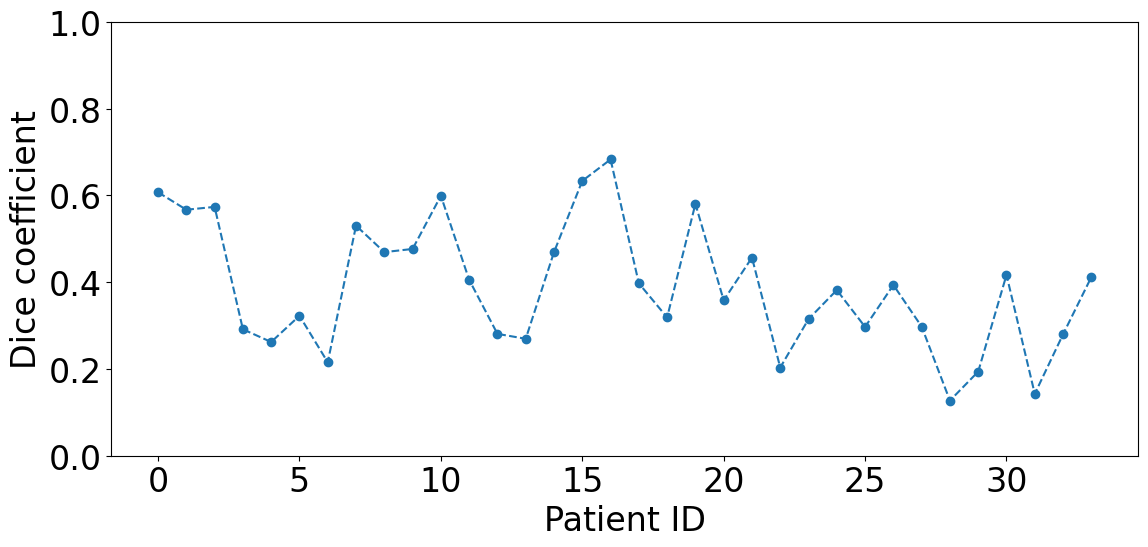

[1025825 1052473 1053514 1053863 1081121 1082819 1084441 1084939 1091400
 1096371 1101543 1104289 1106125 1120249 1124373 1128451 1131799 1158513
 1193512 1208287 1260522 2082714 2085757 2150717 2212201  372868  539789
  653097  699783  846260  867447  876094  927498  930104]


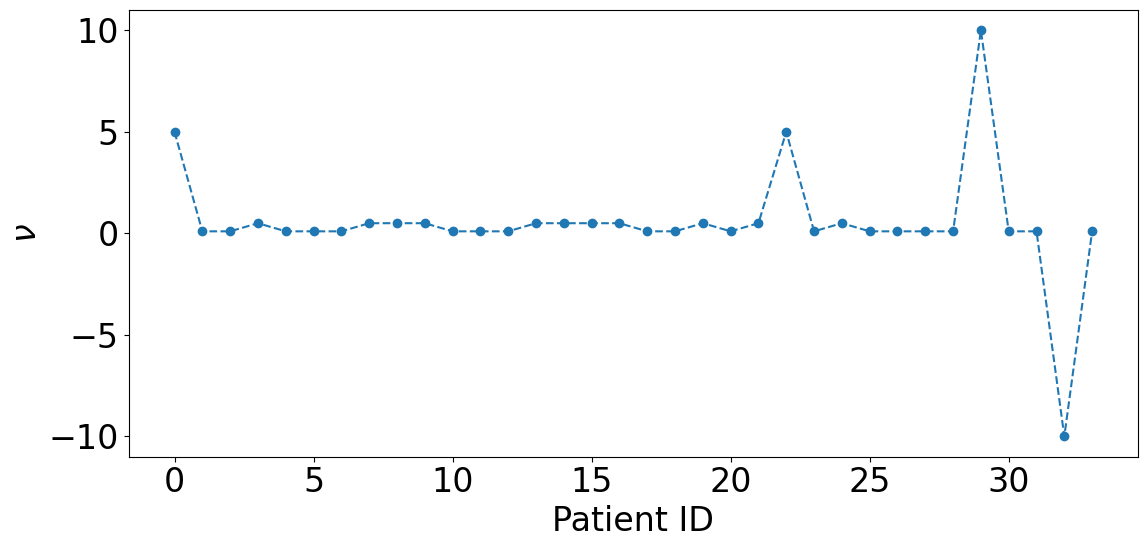


u


In [8]:

savePath = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results'

results = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results/10_1_22_liver_dices.txt'
results = '/rsrch1/ip/rglenn1/quantumSegmentation/QIS-Net/results/10_4_2022_liver_dices.txt'
hcc_results = pd.DataFrame(pd.read_csv(results,sep='\t',skiprows=0, names=['patientID', 'Dice', 'none']))

print(hcc_results)
Liver_dice = hcc_results['Dice']
id = hcc_results['patientID']
patientID = hcc_results.patientID.unique()
print("check that these match", len(patientID), len(hcc_results.patientID))

x = range(len(id))

plt.rcParams['font.size'] = '24'
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Patient ID')
ax1.set_ylabel('Dice coefficient')
ax1.tick_params(axis='y')
ax1.plot(x, Liver_dice, linestyle="--", marker="o", label='Dice coefficient')
ax1.set_ylim(0, 1.0)

fig.tight_layout()
print(patientID)
#print(yDice)

#ax2.set_title(titlename)

plt.savefig(savePath + "/" + 'QIS_detection_stats.png', bbox_inches="tight")
plt.show() 

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Patient ID')
ax1.set_ylabel('$\\nu$')
ax1.tick_params(axis='y')
ax1.plot(x, hcc_results['none'], linestyle="--", marker="o", label='\nu')
ax1.set_ylim(-11, 11.0)

fig.tight_layout()
print(patientID)
#print(yDice)

#ax2.set_title(titlename)

plt.savefig(savePath + "/" + 'QIS_nu.png', bbox_inches="tight")
plt.show() 
print('\nu')

In [3]:
import numpy as np

headers = ['QIS-NET', "Mean", "Median", "Min", "Max", "Std"]

diceList = ["Dice Similarity Coefficient (" + 'QIS-NET' + ")", np.mean(Liver_dice), np.median(Liver_dice),  min(Liver_dice), max(Liver_dice), np.std(Liver_dice)]
data = pd.DataFrame([ diceList], columns=headers)

data.to_csv(savePath + "/" + 'QIS' +'_anay' + '.csv', mode='a', index=False, header=True )

print(data)

                                 QIS-NET      Mean    Median       Min  \
0  Dice Similarity Coefficient (QIS-NET)  0.389158  0.387799  0.127094   

       Max      Std  
0  0.68314  0.14509  


In [6]:
display(Liver_dice)

[0.521419,
 0.334722,
 0.382671,
 0.444976,
 0.420464,
 0.318734,
 0.363645,
 0.362741,
 0.396573,
 0.341016,
 0.45819,
 0.38242,
 0.337693,
 0.341524,
 0.349495,
 0.484808,
 0.382131,
 0.28012,
 0.368191,
 0.372603,
 0.31936,
 0.46015,
 0.427234,
 0.374026,
 0.356922,
 0.331416,
 0.36513,
 0.378523,
 0.266867,
 0.453745,
 0.409894,
 0.284997,
 0.356358,
 0.244898]